# **Tempo de Sono - Análise Preditiva**

https://www.kaggle.com/datasets/govindaramsriram/sleep-time-prediction/code

**Variáveis:**

- WorkOutTime: tempo de exercício físico
- ReadingTime: tempo de leitura
- PhoneTime: tempo no telefone
- WorHours: horas trabalhadas
- CaffeineIntake: ingestão de cafeína
- RelaxationTime: tempo de descanso
- SleepTime: tempo de sono

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('sleeptime_prediction_dataset.csv')
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [3]:
df.shape

(2000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [5]:
df.isna().value_counts()

,,,,,,,count
WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,
False,False,False,False,False,False,False,2000


In [6]:
df.isnull().value_counts()

,,,,,,,count
WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,
False,False,False,False,False,False,False,2000


In [7]:
df.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


In [8]:
# total de valores únicos em cada variável
valores_unicos = []
for i in df.columns[0:7].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

WorkoutTime : 300
ReadingTime : 201
PhoneTime : 394
WorkHours : 581
CaffeineIntake : 1939
RelaxationTime : 201
SleepTime : 475


In [9]:
# avaliando o maior e menor valor da variável SleepTime
print('O mínimo de tempo dormido é de:', df['SleepTime'].min())
print('O máximo de tempo dormido é de:', df['SleepTime'].max())

O mínimo de tempo dormido é de: 0.15
O máximo de tempo dormido é de: 19.81


In [10]:
# avaliando o maior e menor valor da variável RelaxationTime
print('O mínimo de tempo relaxado é de:', df['RelaxationTime'].min())
print('O máximo de tempo relaxado é de:', df['RelaxationTime'].max())

O mínimo de tempo relaxado é de: 0.0
O máximo de tempo relaxado é de: 2.0


In [11]:
# avaliando o maior e menor valor da variável CaffeineIntake
print('O mínimo de cafeína ingerida é de:', df['CaffeineIntake'].min())
print('O máximo de cafeína ingerida é de:', df['CaffeineIntake'].max())

O mínimo de cafeína ingerida é de: 0.02
O máximo de cafeína ingerida é de: 299.85


In [12]:
# avaliando o maior e menor valor da variável WorkHours
print('O mínimo de horas de trabalho é de:', df['WorkHours'].min())
print('O máximo de horas de trabalho é de:', df['WorkHours'].max())

O mínimo de horas de trabalho é de: 4.0
O máximo de horas de trabalho é de: 10.0


In [13]:
# avaliando o maior e menor valor da variável PhoneTime
print('O mínimo de horas no telefone é de:', df['PhoneTime'].min())
print('O máximo de horas no telefone é de:', df['PhoneTime'].max())

O mínimo de horas no telefone é de: 1.0
O máximo de horas no telefone é de: 5.0


In [14]:
# avaliando o maior e menor valor da variável ReadingTime
print('O mínimo de horas de leitura é de:', df['ReadingTime'].min())
print('O máximo de horas de leitura é de:', df['ReadingTime'].max())

O mínimo de horas de leitura é de: 0.0
O máximo de horas de leitura é de: 2.0


In [15]:
# avaliando o maior e menor valor da variável WorkoutTime
print('O mínimo de tempo de exercício físico é de:', df['WorkoutTime'].min())
print('O máximo de tempo de exercício físico é de:', df['WorkoutTime'].max())

O mínimo de tempo de exercício físico é de: 0.01
O máximo de tempo de exercício físico é de: 3.0


Faremos uma plotagem única das variáveis afim de identificarmos visualmente possíveis outliers e realizar o tratamento. Analisaremos o tempo de sono, nossa variável target individualmente.

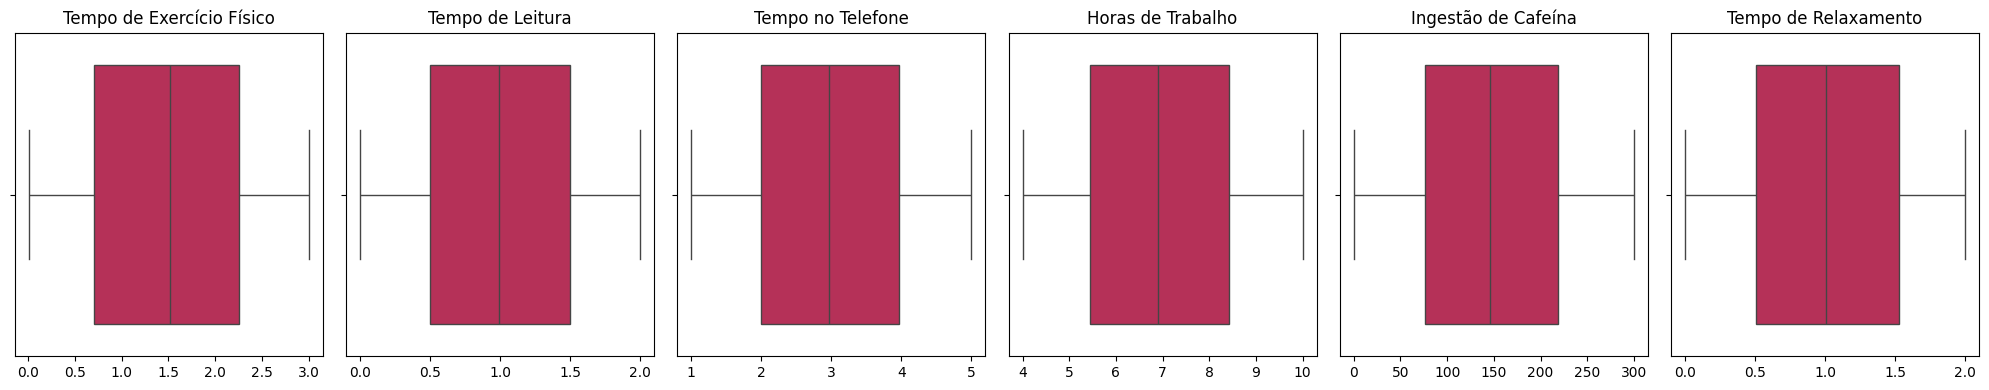

In [16]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 6, 1)
ax1 = sns.boxplot(data=df, x='WorkoutTime', palette ='rocket')
plt.title('Tempo de Exercício Físico')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 6, 2)
ax2 = sns.boxplot(data=df, x='ReadingTime', palette ='rocket')
plt.title('Tempo de Leitura')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 6, 3)
ax3 = sns.boxplot(data=df, x='PhoneTime', palette ='rocket')
plt.title('Tempo no Telefone')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 6, 4)
ax4 = sns.boxplot(data=df, x='WorkHours', palette ='rocket')
plt.title('Horas de Trabalho')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 6, 5)
ax5 = sns.boxplot(data=df, x='CaffeineIntake', palette ='rocket')
plt.title('Ingestão de Cafeína')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 6, 6)
ax6 = sns.boxplot(data=df, x='RelaxationTime', palette ='rocket')
plt.title('Tempo de Relaxamento')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

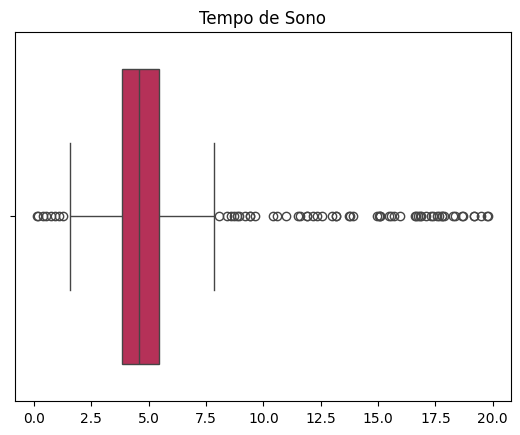

In [17]:
ax7 = sns.boxplot(data=df, x='SleepTime', palette ='rocket', orient = 'h')
plt.title('Tempo de Sono')
plt.xlabel('')
plt.ylabel('')
plt.show()

Temos outliers na variável, entretanto o tempo de sono pode variar de pessoa para pessoa.

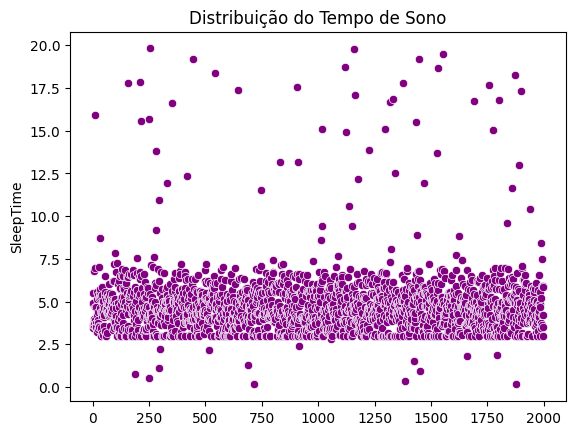

In [18]:
sns.scatterplot(df['SleepTime'], color='purple')
plt.title("Distribuição do Tempo de Sono")
plt.show()

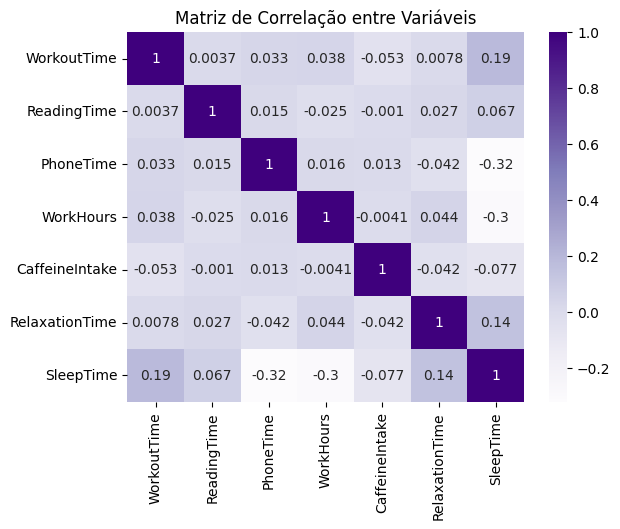

In [19]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

Vimos que as variáveis não possuem muita relação numérica, então faremos uma nova coluna no df, afim de classificar como ideal e deficit os tempos de sono.

SleepTimeStatus
- A partir de 8h = ideal
- Menor que 8h = deficit

In [20]:
new_df = df.copy()
new_df['SleepTimeStatus'] = np.where(new_df['SleepTime'] >= 8, 'Ideal', 'Deficit')
new_df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime,SleepTimeStatus
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45,Deficit
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88,Deficit
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61,Deficit
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94,Deficit
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50,Deficit


### **Tratando o Modelo**

**Label Encoder:**

In [21]:
label_encoder_status = LabelEncoder()
new_df['SleepTimeStatus'] = label_encoder_status.fit_transform(new_df['SleepTimeStatus'])
status = new_df['SleepTimeStatus'].unique()
print(status)
status_count = new_df['SleepTimeStatus'].value_counts()
print(status_count)

[0 1]
SleepTimeStatus
0    1944
1      56
Name: count, dtype: int64


Nossa variável target está desbalanceada.

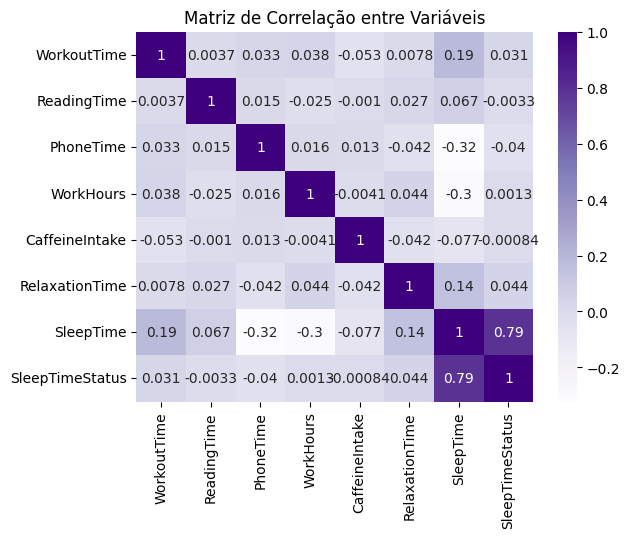

In [22]:
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

Temos uma forte relação entre a nossa nova variável e o tempo de sono.

**Divisão das preditoras x target e treino x teste:**

In [23]:
PREDITORAS = new_df.drop('SleepTimeStatus', axis =1)
TARGET = new_df['SleepTimeStatus']

In [24]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS, TARGET, test_size = 0.3, random_state = 42)

In [25]:
X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape

((1400, 7), (600, 7), (1400,), (600,))

**Trabalharemos com a normalização dos dados - Deixando-os na mesma escala:**

In [26]:
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [27]:
X_treino_normalizados

array([[0.91304348, 0.995     , 0.37844612, ..., 0.50454728, 0.575     ,
        0.30510204],
       [0.94983278, 0.64      , 0.31328321, ..., 0.07001471, 0.9       ,
        0.28979592],
       [0.02675585, 0.3       , 0.68170426, ..., 0.59545941, 0.86      ,
        0.22653061],
       ...,
       [0.77591973, 0.865     , 0.62656642, ..., 0.50722215, 0.95      ,
        0.31173469],
       [0.65886288, 0.65      , 0.95739348, ..., 0.34268423, 0.87      ,
        0.23469388],
       [0.08361204, 0.675     , 0.54887218, ..., 0.41701217, 0.835     ,
        0.26071429]])

In [28]:
df_treino = pd.DataFrame(X_treino_normalizados, columns=PREDITORAS.columns)
df_teste = pd.DataFrame(X_teste_normalizados,columns=PREDITORAS.columns )

### **Criando e treinando o modelo:**

**Random Forest:**

In [36]:
randomForest = RandomForestClassifier()

# Treinamento
inicio_treino = time.time()
randomForest.fit(X_treino_normalizados, Y_treino)
fim_treino = time.time()

acuracia_treinamento = randomForest.score(X_treino_normalizados, Y_treino)

# Teste
inicio_teste = time.time()
acuracia_teste = randomForest.score(X_teste_normalizados, Y_teste)
fim_teste = time.time()

print(f"Acurácia em Treinamento: {acuracia_treinamento:.2%}")
print("Tempo de Treinamento do Modelo: ", round(fim_treino - inicio_treino, 2))
print(f"Acurácia em Teste: {acuracia_teste:.2%}")
print("Tempo de Teste do Modelo: ", round(fim_teste - inicio_teste, 2))

Acurácia em Treinamento: 100.00%
Tempo de Treinamento do Modelo:  0.63
Acurácia em Teste: 99.83%
Tempo de Teste do Modelo:  0.03


Exibindo a importancia de cada variavel no modelo preditivo:

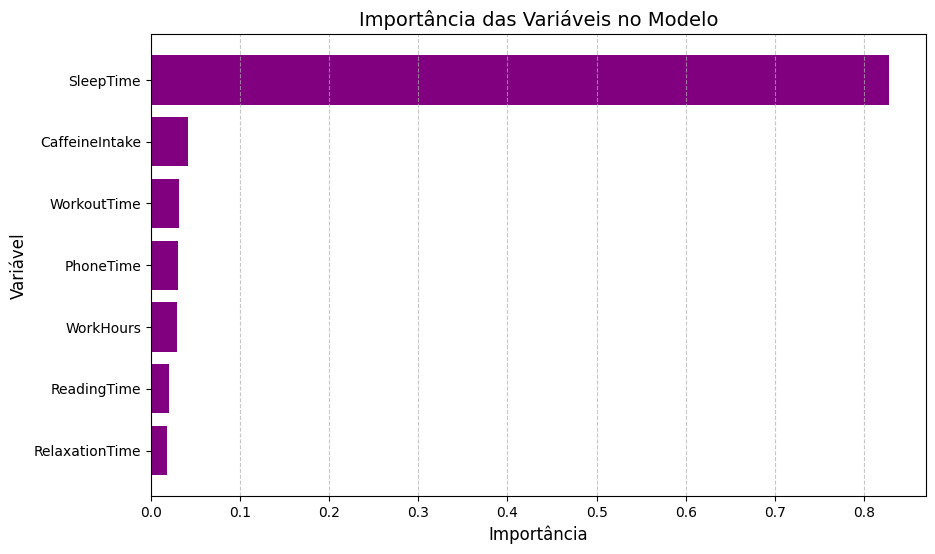

In [40]:
variaveis = df_teste.columns

importancias = randomForest.feature_importances_

df_importancias = pd.DataFrame({'Variável': variaveis, 'Importância': importancias})
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importancias['Variável'], df_importancias['Importância'], color='purple')
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.title('Importância das Variáveis no Modelo', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()